In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.all import *
from pathlib import Path
import torch
torch.cuda.set_device(3)

In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
datapath = Path(os.getcwd())/"Labeled_dataset"
print(datapath)

/raid10/active_users/adijat/ml/Labeled_dataset


In [4]:
Path(os.getcwd())/"Labeled_dataset"

Path('/raid10/active_users/adijat/ml/Labeled_dataset')

In [5]:
Path(os.getcwd())/"Labeled_dataset/sugarbeet_stage_1"
Path(os.getcwd())/"Labeled_dataset/sugarbeet_stage_2"
Path(os.getcwd())/"Labeled_dataset/Apple"

Path('/raid10/active_users/adijat/ml/Labeled_dataset/Apple')

In [6]:
import os
from PIL import Image

data_path = "Labeled_dataset"
sugarbeet_stage_1_path = os.path.join(data_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(data_path, "sugarbeet_stage_2")
apple_path = os.path.join(data_path, "Apple")

# Loop through all the files in the Sugarbeet-Stage1 directory
print("Files in sugarbeet_stage_1 directory:")
for filename in os.listdir(sugarbeet_stage_1_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Sugarbeet-Stage2 directory
print("Files in sugarbeet_stage_2 directory:")
for filename in os.listdir(sugarbeet_stage_2_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Apple directory
print("Files in Apple directory:")
for filename in os.listdir(apple_path):
    if filename.endswith(".JPG"):
        print(filename)


Files in sugarbeet_stage_1 directory:
image-01313.jpg
image-0128.jpg
image-01517.jpg
image-0105.jpg
image-0185.jpg
image-01311.jpg
image-0156.jpg
image-0129.jpg
image-02611.jpg
image-01418.jpg
image-0054.jpg
image-0122.jpg
image-01712.jpg
image-0394.jpg
image-016.jpg
image-01512.jpg
image-01416.jpg
image-0294.jpg
image-0242.jpg
image-031.jpg
image-01419.jpg
image-0149.jpg
image-0237.jpg
image-01413.jpg
image-014.jpg
image-0354.jpg
image-0303.jpg
image-02710.jpg
image-01514.jpg
image-0284.jpg
image-01515.jpg
image-0382.jpg
image-02012.jpg
image-0327.jpg
image-0127.jpg
image-0138.jpg
image-0173.jpg
image-0205.jpg
image-0226.jpg
image-00313.jpg
image-01617.jpg
image-0309.jpg
image-0324.jpg
image-0204.jpg
image-03410.jpg
image-0337.jpg
image-0102.jpg
image-0356.jpg
image-0187.jpg
image-0267.jpg
image-01312.jpg
image-0207.jpg
image-0252.jpg
image-02010.jpg
image-025.jpg
image-0302.jpg
image-0265.jpg
image-0393.jpg
image-0364.jpg
image-01811.jpg
image-039.jpg
image-01810.jpg
image-0203.jpg
i

In [7]:
import os
from PIL import Image

image_path = "Labeled_dataset"
sugarbeet_stage_1_path = os.path.join(image_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(image_path, "sugarbeet_stage_2")
Apple_path = os.path.join(image_path, "Apple")

# Loop through all the files in the directory
for filename in os.listdir(Apple_path):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".JPG"):
        # Open the image file
        Apple_img = Image.open(os.path.join(Apple_path, filename))
        # Do something with the image
        print(Apple_img.size)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

In [8]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Labeled_dataset")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


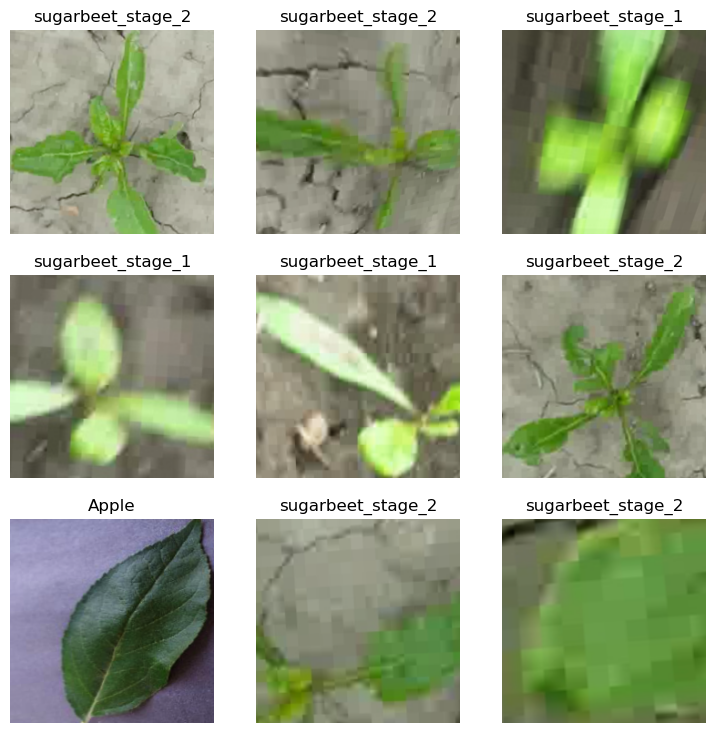

In [9]:
dls = data.dataloaders(Path("Labeled_dataset"))
dls.show_batch()

In [10]:
# Load a pre-trained model
learn = vision_learner(dls, resnet50, metrics=accuracy)

/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# Fine-tune the model
learn.fine_tune(10)

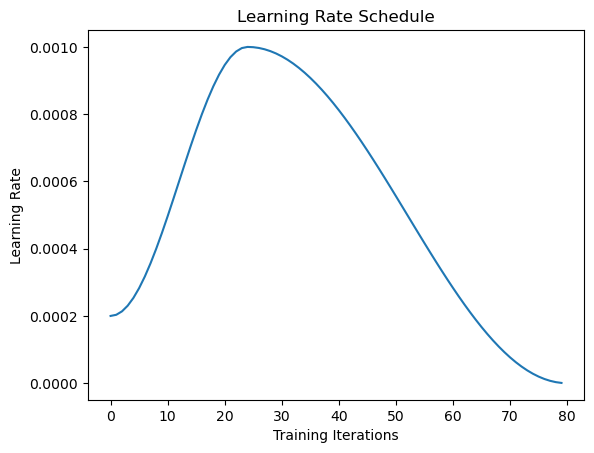

In [12]:
import matplotlib.pyplot as plt

# Get the learning rate values
lrs = learn.recorder.lrs

# Plot the learning rate schedule
plt.plot(range(len(lrs)), lrs)
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

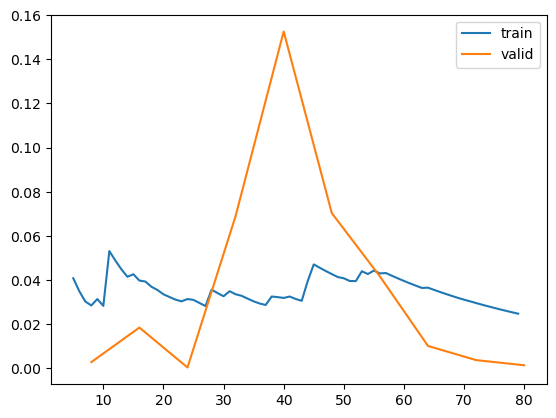

In [13]:
import matplotlib.pyplot as plt

# Create a recorder object
recorder = learn.recorder

# Plot the validation and training losses
recorder.plot_loss()


In [14]:
# Evaluate the model
acc = learn.validate()[1]
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [15]:
Path(os.getcwd())/"unlabeled"

Path('/raid10/active_users/adijat/ml/unlabeled')

In [16]:
Path(os.getcwd())/"unlabeled"

Path('/raid10/active_users/adijat/ml/unlabeled')

In [17]:
import os

data_path = os.path.join(os.getcwd(), "unlabeled")

image_files = [file for file in os.listdir(data_path) if file.lower().endswith((".jpg", ".jpeg"))]

print("Files in unlabeled directory:")
print(image_files)


Files in unlabeled directory:
['7bf79f19-bb50-44cd-b8d5-0b4d6794689b___RS_HL 7989.jpg', 'image-0408.jpg', 'dji-55-image-12329.jpg', 'dji-55-image-06913.jpg', 'dji-55-image-1377.jpg', 'image-0853.jpg', 'dji-55-image-0488.jpg', 'dji-55-image-0659.jpg', 'dji-55-image-11012.jpg', 'dji-55-image-11218.jpg', 'image-00218.jpg', 'image-048.jpg', 'dji-55-image-13014.jpg', 'dji-55-image-064.jpg', 'dji-55-image-11212.jpg', '8c43ceb4-000b-441b-887f-ef495da381e2___RS_HL 7864.jpg', 'dji-55-image-14327.jpg', 'dji-55-image-0595.jpg', 'image-00616.jpg', '65a6866e-a6ea-46d5-a8ca-413f98cd8b7a___RS_HL 5817.jpg', 'image-0567.jpg', '3d075f90-7002-4c45-abc0-4f35ee49aa79___RS_HL 6272.jpg', 'dji-55-image-12811.jpg', '3f9788c1-8456-453f-b1c2-5cc66ba714a6___RS_HL 7635.jpg', 'dji-55-image-0783.jpg', 'image-107.jpg', 'image-1048.jpg', 'image-05710.jpg', 'd57beb14-b60a-431f-8a41-17a342cba57a___RS_HL 5737.jpg', '0bb2ddc5-d1f4-4fc2-be6b-6b63c60790df___RS_HL 7550.JPG', 'image-070.jpg', '6fe99b1c-d402-4756-a21b-ff964b99

In [18]:
import os
from PIL import Image

image_path = "unlabeled"

# Loop through all the files in the directory
for filename in os.listdir(image_path):
    # Check if the file is an image file
    if filename.endswith((".jpg", ".JPG")):
        # Open the image file
        image_file = os.path.join(image_path, filename)
        with Image.open(image_file) as img:
            # Do something with the image
            print(img.size)


(256, 256)
(175, 83)
(307, 311)
(201, 188)
(220, 289)
(243, 227)
(255, 290)
(103, 266)
(268, 270)
(112, 122)
(252, 121)
(190, 229)
(118, 141)
(258, 316)
(222, 148)
(256, 256)
(140, 106)
(285, 256)
(147, 104)
(256, 256)
(129, 177)
(256, 256)
(263, 260)
(256, 256)
(234, 219)
(244, 209)
(383, 185)
(125, 117)
(256, 256)
(256, 256)
(193, 223)
(256, 256)
(256, 256)
(256, 256)
(268, 203)
(252, 324)
(284, 162)
(256, 256)
(256, 256)
(213, 155)
(198, 169)
(247, 162)
(117, 137)
(304, 314)
(221, 257)
(256, 256)
(190, 176)
(256, 256)
(165, 200)
(146, 218)
(174, 232)
(256, 256)
(279, 211)
(231, 281)
(88, 113)
(256, 256)
(256, 256)
(240, 231)
(256, 256)
(256, 256)
(285, 193)
(208, 128)
(297, 250)
(288, 230)
(301, 282)
(251, 212)
(84, 103)
(256, 256)
(229, 188)
(295, 281)
(151, 160)
(159, 143)
(322, 289)
(183, 115)
(190, 152)
(371, 301)
(205, 175)
(302, 232)
(256, 256)
(41, 95)
(235, 262)
(119, 177)
(213, 305)
(254, 215)
(257, 220)
(83, 118)
(182, 336)
(268, 130)
(256, 256)
(261, 220)
(297, 282)
(251,

In [19]:
from fastai.vision.all import *

unlabeled_path = Path("unlabeled")

# Define a DataBlock for loading the unlabeled images
unlabeled_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,

    get_y=noop,  # No labels for unlabeled data
    item_tfms=[Resize(224)]
)

# Create a dataloader for the unlabeled data
unlabeled_dls = unlabeled_data.dataloaders(unlabeled_path, bs=64)


In [20]:
#Select a batch of unlabeled samples
batch_size = 100  # Set the desired batch size
unlabeled_samples = unlabeled_dls.train.items[:batch_size]

In [21]:
# Print the selected unlabeled samples
print(unlabeled_samples)

# Check the number of samples
print(len(unlabeled_samples))

[Path('unlabeled/dji-55-image-14833.jpg'), Path('unlabeled/dji-55-image-06014.jpg'), Path('unlabeled/image-0426.jpg'), Path('unlabeled/dji-55-image-10424.jpg'), Path('unlabeled/dji-55-image-12913.jpg'), Path('unlabeled/167f64e6-c4c5-423b-8506-9b8210d5fd75___RS_HL 7926.jpg'), Path('unlabeled/dji-55-image-06113.jpg'), Path('unlabeled/dji-55-image-00515.jpg'), Path('unlabeled/31c8c28a-ba8f-4869-a623-949d6c67275d___RS_HL 8177.jpg'), Path('unlabeled/dji-55-image-00416.jpg'), Path('unlabeled/image-0692.jpg'), Path('unlabeled/dji-55-image-108.jpg'), Path('unlabeled/dji-55-image-04914.jpg'), Path('unlabeled/dji-55-image-13014.jpg'), Path('unlabeled/dji-55-image-05611.jpg'), Path('unlabeled/dji-55-image-12010.jpg'), Path('unlabeled/32da947b-7d05-459b-a5dc-b4481bb09f48___RS_HL 7450.jpg'), Path('unlabeled/image-06910.jpg'), Path('unlabeled/dji-55-image-10620.jpg'), Path('unlabeled/4ddc6bdf-fa72-43ff-99df-36430b318df4___RS_HL 7499.jpg'), Path('unlabeled/dji-55-image-07113.jpg'), Path('unlabeled/4e

In [22]:
# Specify the file path where you want to save the model
model_path = 'model.batch'

# Save the model
learn.save(model_path)


Path('models/model.batch.pth')

In [23]:
learn.export('model.batch')

In [24]:
learn = load_learner('model.batch')

In [25]:
import os
from PIL import Image
from fastai.vision.all import *
from torchvision import transforms


# Path to the directory containing unlabeled images
unlabeled_data_path = "unlabeled"

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define a threshold for confidence
confidence_threshold = 0.5

# Load the saved model using load_learner
model_path = 'model.batch'  
learn = load_learner(model_path)

# Access the model from the learner
model = learn.model

# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# If your model uses custom functions like get_label, they are already defined in the learner
# No need to re-define them here

# Initialize a list to store the uncertain samples
uncertain_samples = []

# Iterate over the files in the folder
for file_name in os.listdir(unlabeled_data_path):
    # Construct the path to the file
    file_path = os.path.join(unlabeled_data_path, file_name)
    
    # Check if the path is a file and has a valid image file extension
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        continue
    
    # Load and preprocess the image
    try:
        img = Image.open(file_path)
        img = transform(img)
    except Exception as e:
        print(f"Error opening image file: {file_path}")
        continue
    
    # Add an extra dimension to match the batch size expected by the model
    img = img.unsqueeze(0)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Move the preprocessed image to the same device as the model
    img = img.to(device)
    
    # Disable gradient calculation since we're only doing inference
    with torch.no_grad():
        # Pass the preprocessed image through the model
        prediction = model(img)
    
    # Convert the prediction to probabilities using softmax
    probabilities = torch.softmax(prediction, dim=1)
    
    # Get the maximum predicted probability and its corresponding class
    max_prob, predicted_class = torch.max(probabilities, dim=1)
    
    # Check if the maximum predicted probability is below the confidence threshold
    if max_prob.item() < confidence_threshold:
        uncertain_samples.append(file_path)

# Print the uncertain samples
for sample in uncertain_samples:
    print(sample)


In [26]:
labeled_data_path = "Labeled_dataset"  # Path to the directory containing labeled images

# Iterate over the uncertain samples
for sample_path in uncertain_samples:
    # Ask the user for the correct label
    correct_label = input(f"Enter the correct label for sample {sample_path}: ")
    
    # Create the subfolder path for the correct label
    correct_label_path = os.path.join(labeled_data_path, correct_label)
    
    # Create the subfolder if it doesn't exist
    os.makedirs(correct_label_path, exist_ok=True)
    
    # Move the sample to the correct label subfolder
    sample_filename = os.path.basename(sample_path)
    new_sample_path = os.path.join(correct_label_path, sample_filename)
    os.rename(sample_path, new_sample_path)

print("Annotation completed!")


Annotation completed!


In [27]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Labeled_dataset")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


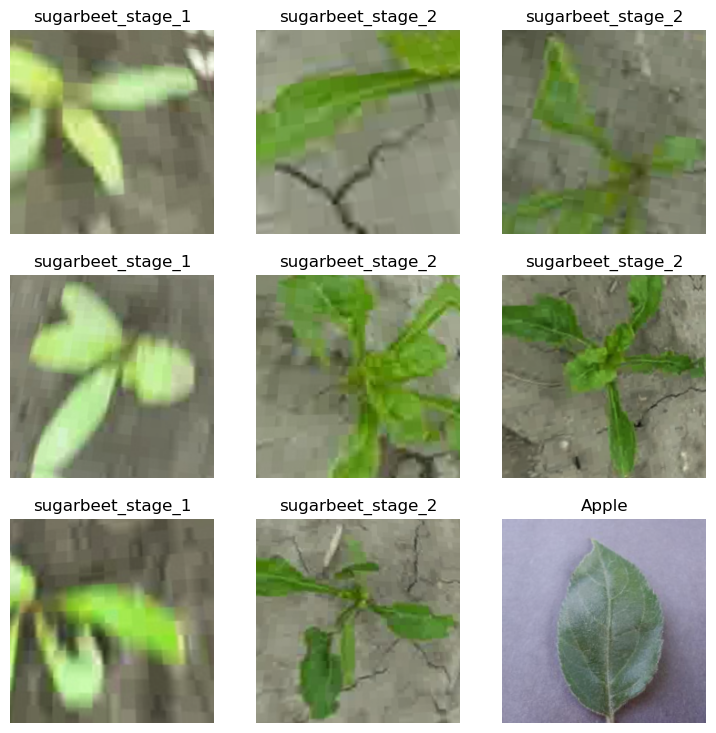

In [28]:
dls = data.dataloaders(Path("Labeled_dataset"))
dls.show_batch()

In [29]:
from fastai.vision.all import *

learn = cnn_learner(dls, resnet50, metrics=accuracy)


/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
learn.load('model.batch')

In [31]:
learn.fine_tune(10)  # Train for 10 epochs

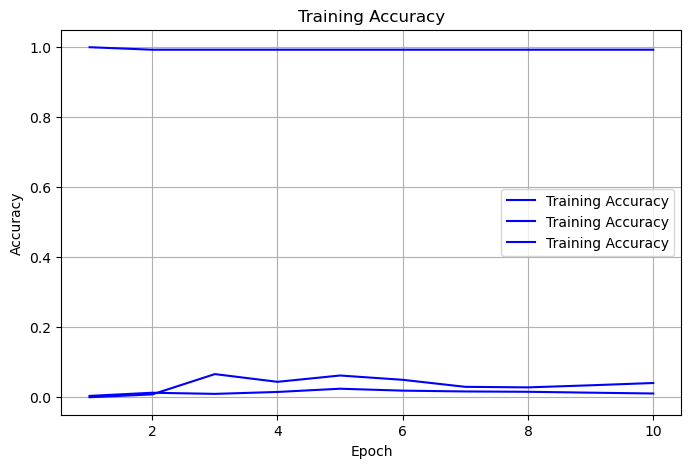

In [32]:
import matplotlib.pyplot as plt

# Get the training history from the learner
train_history = learn.recorder

# Create a list of epoch numbers (assuming each validation is done at the end of an epoch)
epochs = list(range(1, len(train_history.values) + 1))

# Plot the accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_history.values, label='Training Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
learn.save('new_batch_model')

Path('models/new_batch_model.pth')

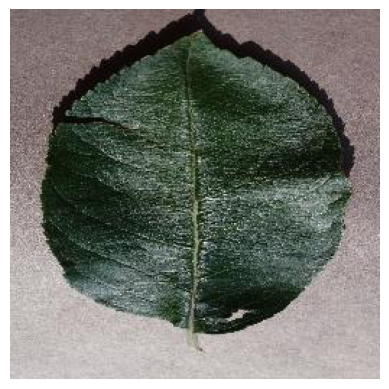

Prediction: Apple


In [34]:
import PIL

# Define the path to your new image
new_image_path = "unlabeled/14e92721-00a0-4696-9392-d3f633082454___RS_HL 5654.jpg"

# Load the image using the PIL library
img = PIL.Image.open(new_image_path)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the trained model
pred, _, _ = learn.predict(new_image_path)

# Print the predicted label
print(f"Prediction: {pred}")


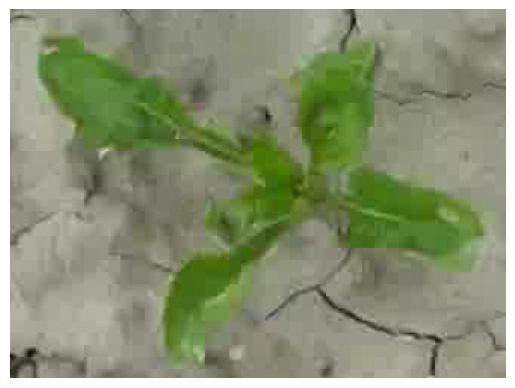

Prediction: sugarbeet_stage_2


In [35]:
import PIL

# Define the path to your new image
new_image_path = "unlabeled/dji-55-image-00612.jpg"

# Load the image using the PIL library
img = PIL.Image.open(new_image_path)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the trained model
pred, _, _ = learn.predict(new_image_path)

# Print the predicted label
print(f"Prediction: {pred}")


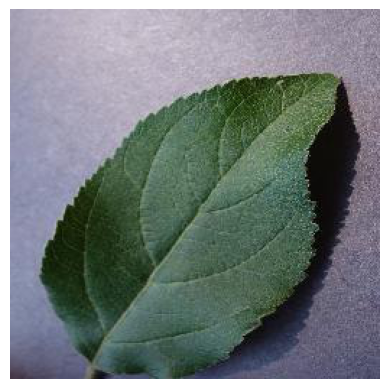

Prediction for 7bf79f19-bb50-44cd-b8d5-0b4d6794689b___RS_HL 7989.jpg: Apple


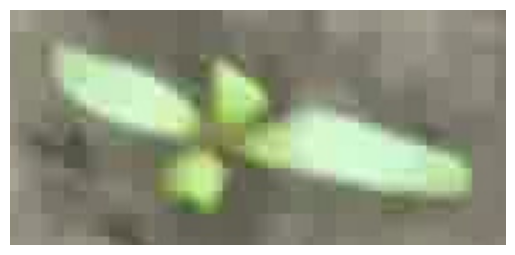

Prediction for image-0408.jpg: sugarbeet_stage_1


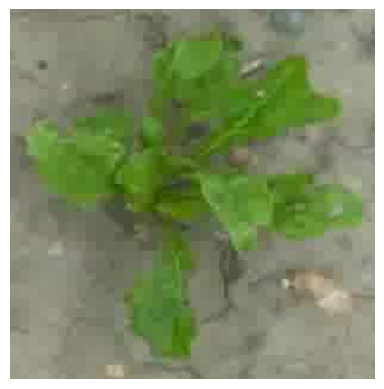

Prediction for dji-55-image-12329.jpg: sugarbeet_stage_2


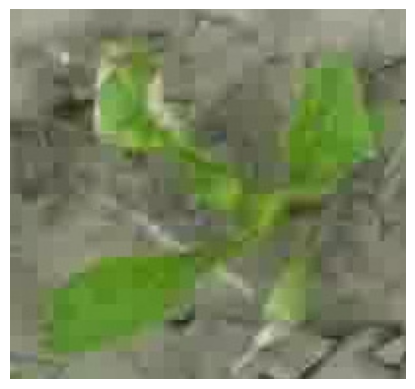

Prediction for dji-55-image-06913.jpg: sugarbeet_stage_2


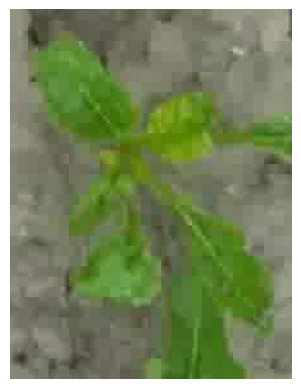

Prediction for dji-55-image-1377.jpg: sugarbeet_stage_2


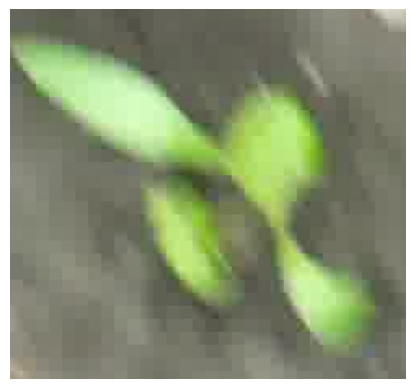

Prediction for image-0853.jpg: sugarbeet_stage_1


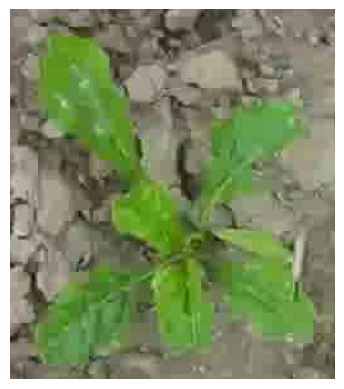

Prediction for dji-55-image-0488.jpg: sugarbeet_stage_2


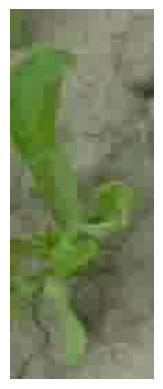

Prediction for dji-55-image-0659.jpg: sugarbeet_stage_2


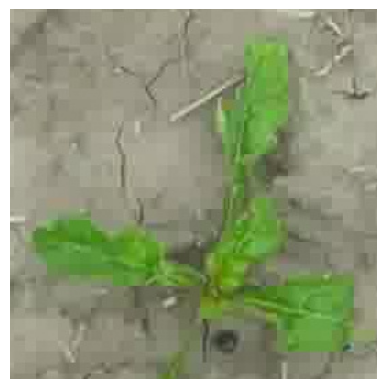

Prediction for dji-55-image-11012.jpg: sugarbeet_stage_2


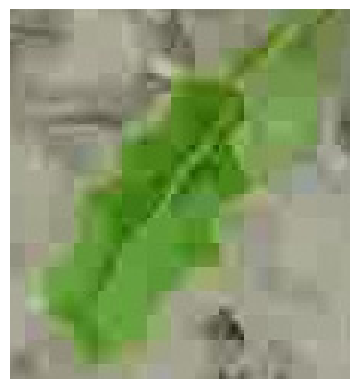

Prediction for dji-55-image-11218.jpg: sugarbeet_stage_2


In [36]:
import os
import PIL

# Define the path to your unlabeled data directory
unlabeled_data_dir = 'unlabeled'

# Get a list of image files in the unlabeled data directory, excluding the .ipynb_checkpoints directory
image_files = [file_name for file_name in os.listdir(unlabeled_data_dir) if not file_name.startswith('.ipynb_checkpoints')]

# Select the first 10 images for prediction
image_files = image_files[:10]

# Iterate over the image files
for file_name in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(unlabeled_data_dir, file_name)

    # Load the image using the PIL library
    img = PIL.Image.open(image_path)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction using the trained model
    pred, _, _ = learn.predict(image_path)

    # Print the predicted label
    print(f"Prediction for {file_name}: {pred}")


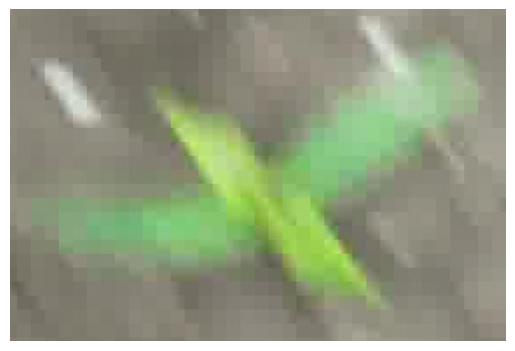

Prediction for image-0898.jpg: sugarbeet_stage_1


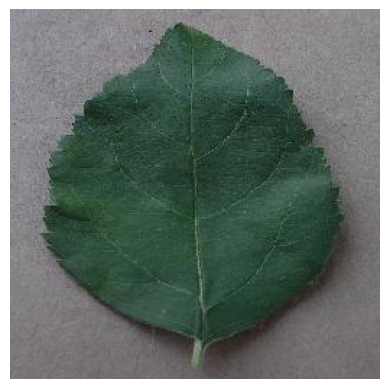

Prediction for 5ceefac5-fa4f-4b5c-b270-3a945fc89ec0___RS_HL 6191.jpg: Apple


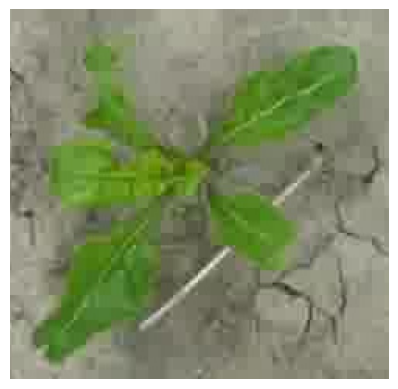

Prediction for dji-55-image-043.jpg: sugarbeet_stage_2


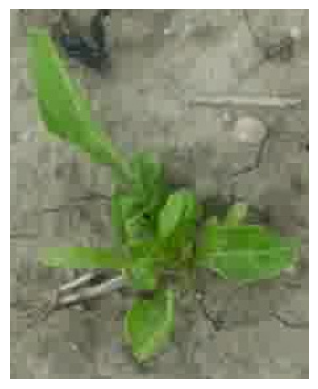

Prediction for dji-55-image-08127.jpg: sugarbeet_stage_2


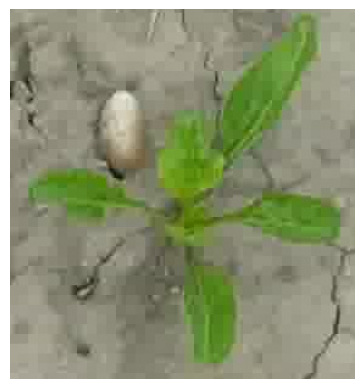

Prediction for dji-55-image-1314.jpg: sugarbeet_stage_2


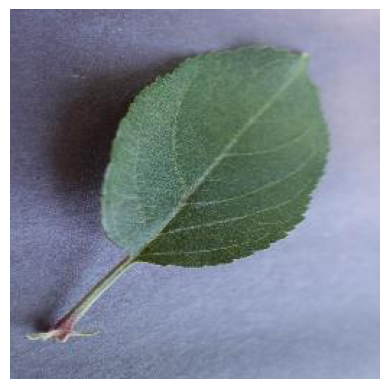

Prediction for 2fbd9205-be67-4f43-be2a-93a8def382a6___RS_HL 7680.jpg: Apple


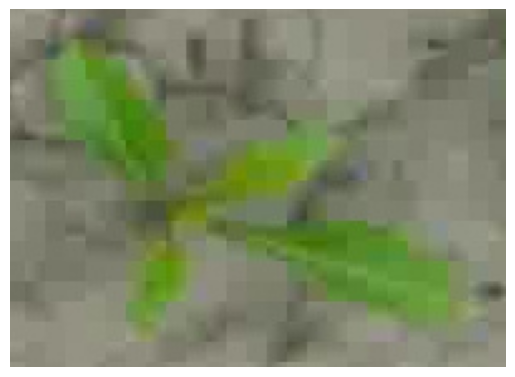

Prediction for dji-55-image-1507.jpg: sugarbeet_stage_2


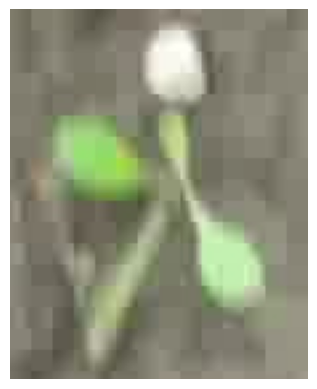

Prediction for image-0119.jpg: sugarbeet_stage_1


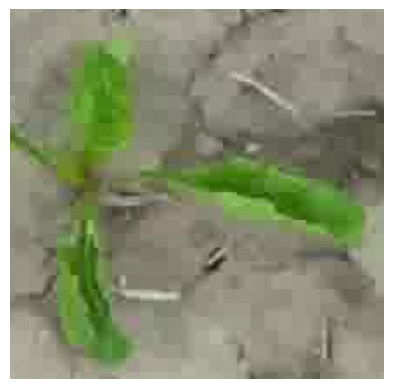

Prediction for dji-55-image-11135.jpg: sugarbeet_stage_2


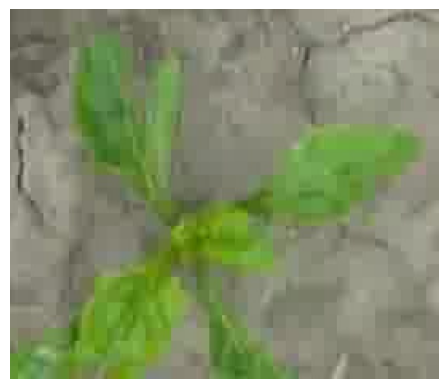

Prediction for dji-55-image-098.jpg: sugarbeet_stage_2


In [37]:
import os
import PIL

# Define the path to your unlabeled data directory
unlabeled_data_dir = 'unlabeled'

# Get a list of image files in the unlabeled data directory, excluding the .ipynb_checkpoints directory
image_files = [file_name for file_name in os.listdir(unlabeled_data_dir) if not file_name.startswith('.ipynb_checkpoints')]

# Select the last 10 images for prediction
image_files = image_files[-10:]

# Iterate over the image files
for file_name in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(unlabeled_data_dir, file_name)

    # Load the image using the PIL library
    img = PIL.Image.open(image_path)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction using the trained model
    pred, _, _ = learn.predict(image_path)

    # Print the predicted label
    print(f"Prediction for {file_name}: {pred}")


In [38]:
datapath = Path(os.getcwd())/"new_data"
print(datapath)

/raid10/active_users/adijat/ml/new_data


In [39]:
Path(os.getcwd())/"new_data/Apple_healthy"
Path(os.getcwd())/"new_data/sugarbeet_stage_1"
Path(os.getcwd())/"new_data/sugarbeet_stage_2"

Path('/raid10/active_users/adijat/ml/new_data/sugarbeet_stage_2')

In [40]:
import os
from PIL import Image

data_path = "new_data"
sugarbeet_stage_1_path = os.path.join(data_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(data_path, "sugarbeet_stage_2")
apple_path = os.path.join(data_path, "Apple")

# Loop through all the files in the Sugarbeet-Stage1 directory
print("Files in sugarbeet_stage_1 directory:")
for filename in os.listdir(sugarbeet_stage_1_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Sugarbeet-Stage2 directory
print("Files in sugarbeet_stage_2 directory:")
for filename in os.listdir(sugarbeet_stage_2_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Apple directory
print("Files in Apple directory:")
for filename in os.listdir(apple_path):
    if filename.endswith(".JPG"):
        print(filename)


Files in sugarbeet_stage_1 directory:
dji-50-image-0476.jpg
dji-50-image-0645.jpg
dji-50-image-020.jpg
dji-51-image-0088.jpg
dji-51-image-0277.jpg
dji-51-image-0303.jpg
dji-51-image-0247.jpg
dji-50-image-0643.jpg
dji-50-image-0113.jpg
dji-50-image-0219.jpg
dji-50-image-0062.jpg
dji-50-image-0187.jpg
dji-51-image-031.jpg
dji-51-image-0057.jpg
dji-51-image-042.jpg
dji-50-image-0565.jpg
dji-51-image-0272.jpg
dji-50-image-0475.jpg
dji-51-image-0234.jpg
dji-51-image-0412.jpg
dji-51-image-0027.jpg
dji-51-image-0176.jpg
dji-51-image-0324.jpg
dji-50-image-0494.jpg
dji-51-image-0375.jpg
dji-50-image-0063.jpg
dji-50-image-0626.jpg
dji-51-image-021.jpg
dji-50-image-0364.jpg
dji-50-image-0296.jpg
dji-51-image-0114.jpg
dji-50-image-0034.jpg
dji-51-image-0025.jpg
dji-50-image-038.jpg
dji-51-image-033.jpg
dji-51-image-0125.jpg
dji-51-image-0082.jpg
dji-50-image-0294.jpg
dji-50-image-0199.jpg
dji-50-image-0483.jpg
dji-51-image-0108.jpg
dji-50-image-0134.jpg
dji-50-image-0314.jpg
dji-50-image-0363.jpg


In [41]:
import os
from PIL import Image
import torch
from torchvision import transforms
from fastai.learner import load_learner

# Load the Learner object with the trained model
model_path = 'model.batch' 
learn = load_learner(model_path)

# Set the model to evaluation mode
learn.model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define the data directory
data_path = "new_data"  # Replace 'new_data' with the path to your data directory

# Define subdirectories within the data directory
sugarbeet_stage_1_path = os.path.join(data_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(data_path, "sugarbeet_stage_2")
apple_path = os.path.join(data_path, "Apple")

# Function to predict images in a given directory
def predict_images(directory_path):
    predictions = []
    for image_file in os.listdir(directory_path):
        image_path = os.path.join(directory_path, image_file)
        if not os.path.isfile(image_path):
            continue
        
        img = Image.open(image_path)
        img = transform(img)
        img = img.unsqueeze(0)
        
        with torch.no_grad():
            prediction = learn.model(img)
        
        probabilities = torch.softmax(prediction, dim=1)
        predicted_class_index = torch.argmax(probabilities).item()
        predicted_class_label = learn.dls.vocab[predicted_class_index]
        predictions.append(predicted_class_label)
    
    return predictions

# Predict images in each subdirectory
sugarbeet_stage_1_predictions = predict_images(sugarbeet_stage_1_path)
sugarbeet_stage_2_predictions = predict_images(sugarbeet_stage_2_path)
apple_predictions = predict_images(apple_path)

# Print the predictions
print("Sugarbeet Stage 1 Predictions:", sugarbeet_stage_1_predictions)
print("Sugarbeet Stage 2 Predictions:", sugarbeet_stage_2_predictions)
print("Apple Predictions:", apple_predictions)


Sugarbeet Stage 1 Predictions: ['sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 'sugarbeet_stage_1', 's

In [47]:
!pip install seaborn numpy pandas matplotlib
!pip install --upgrade seaborn

Confusion Matrix:
[[1644    1    0]
 [   0  719    7]
 [   0   18  713]]


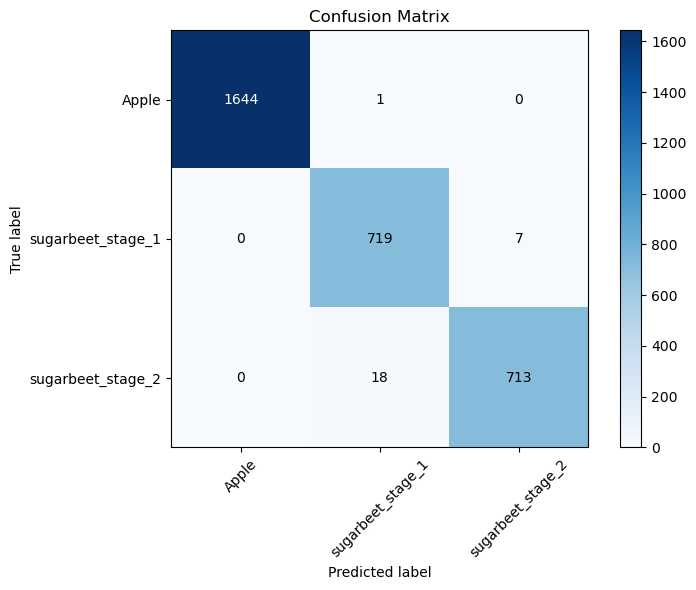

In [51]:
import os
import numpy as np
import torch
from torchvision import transforms
from fastai.learner import load_learner
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the Learner object with the trained model
model_path = 'model.batch'
learn = load_learner(model_path)

# Set the model to evaluation mode
learn.model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Function to predict images in a given directory
def predict_images(directory_path):
    predictions = []
    for image_file in os.listdir(directory_path):
        image_path = os.path.join(directory_path, image_file)
        if not os.path.isfile(image_path):
            continue

        img = Image.open(image_path)
        img = transform(img)
        img = img.unsqueeze(0)

        with torch.no_grad():
            prediction = learn.model(img)

        probabilities = torch.softmax(prediction, dim=1)
        predicted_class_index = torch.argmax(probabilities).item()
        predicted_class_label = learn.dls.vocab[predicted_class_index]
        predictions.append(predicted_class_label)

    return predictions

# Define true labels and predicted labels for each subdirectory
true_labels = []
sugarbeet_stage_1_predictions = predict_images(os.path.join(data_path, "sugarbeet_stage_1"))
sugarbeet_stage_2_predictions = predict_images(os.path.join(data_path, "sugarbeet_stage_2"))
apple_predictions = predict_images(os.path.join(data_path, "Apple"))

# Replace these lists with the true labels for each subdirectory
true_labels.extend(['sugarbeet_stage_1'] * len(sugarbeet_stage_1_predictions))
true_labels.extend(['sugarbeet_stage_2'] * len(sugarbeet_stage_2_predictions))
true_labels.extend(['Apple'] * len(apple_predictions))

# Combine the predicted labels from all subdirectories
all_predictions = sugarbeet_stage_1_predictions + sugarbeet_stage_2_predictions + apple_predictions

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, all_predictions, labels=learn.dls.vocab)

print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = learn.dls.vocab
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha='center', va='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [53]:
import os
import numpy as np
import torch
from torchvision import transforms
from fastai.learner import load_learner
from PIL import Image

# Load the Learner object with the trained model
model_path = 'model.batch'
learn = load_learner(model_path)

# Set the model to evaluation mode
learn.model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Function to predict images in a given directory and display wrongly predicted images
def predict_images(directory_path):
    wrongly_predicted_images = []
    for image_file in os.listdir(directory_path):
        image_path = os.path.join(directory_path, image_file)
        if not os.path.isfile(image_path):
            continue

        img = Image.open(image_path)
        img = transform(img)
        img = img.unsqueeze(0)

        with torch.no_grad():
            prediction = learn.model(img)

        probabilities = torch.softmax(prediction, dim=1)
        predicted_class_index = torch.argmax(probabilities).item()
        predicted_class_label = learn.dls.vocab[predicted_class_index]

        true_label = os.path.basename(directory_path)

        if predicted_class_label != true_label:
            wrongly_predicted_images.append((image_path, true_label, predicted_class_label))

    return wrongly_predicted_images

# Define the data directory
data_path = "new_data"  # Replace 'new_data' with the path to your data directory

# Predict and display wrongly predicted images for each subdirectory
sugarbeet_stage_1_wrong = predict_images(os.path.join(data_path, "sugarbeet_stage_1"))
sugarbeet_stage_2_wrong = predict_images(os.path.join(data_path, "sugarbeet_stage_2"))
apple_wrong = predict_images(os.path.join(data_path, "Apple"))

# Display the wrongly predicted images
for image_path, true_label, predicted_label in sugarbeet_stage_1_wrong + sugarbeet_stage_2_wrong + apple_wrong:
    print("Image Path:", image_path)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("")


Image Path: new_data/sugarbeet_stage_1/dji-51-image-0433.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-50-image-05110.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-51-image-0235.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-51-image-0248.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-51-image-0278.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-51-image-0226.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_1/dji-51-image-0275.jpg
True Label: sugarbeet_stage_1
Predicted Label: sugarbeet_stage_2

Image Path: new_data/sugarbeet_stage_2/dji-67-image-0158.jpg
True Label: sugarbeet_stage_2
Predicted Label: su

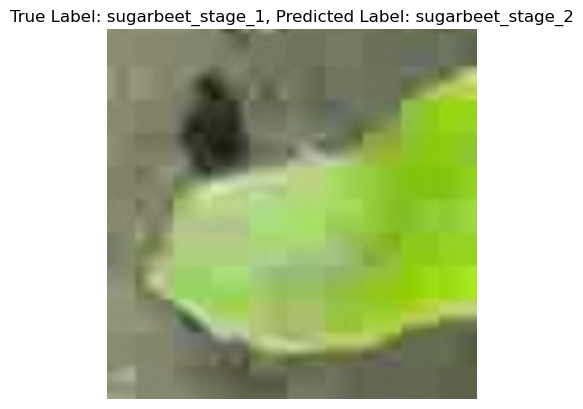

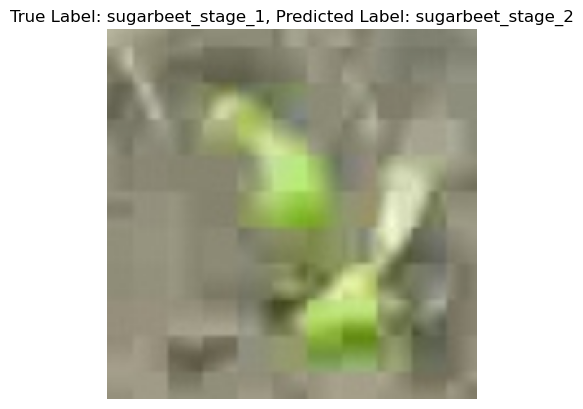

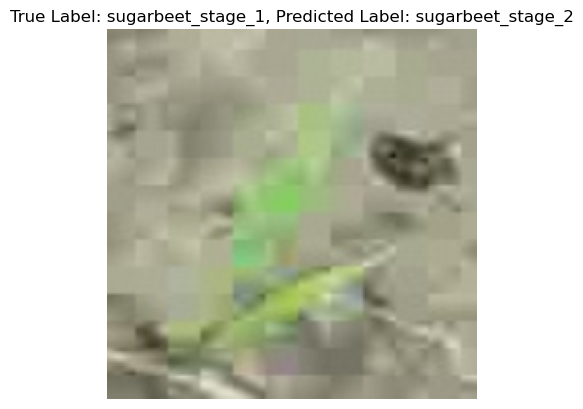

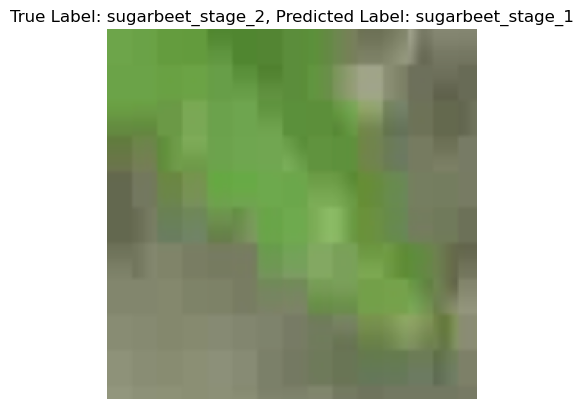

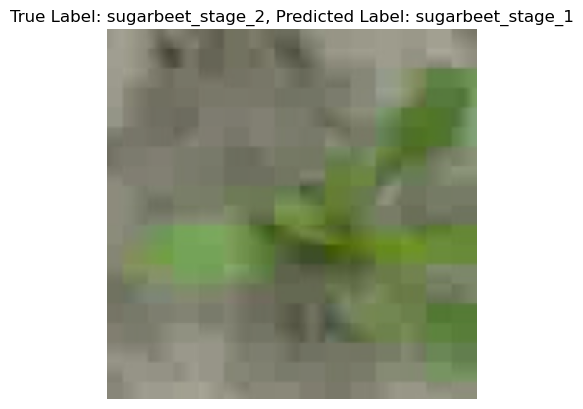

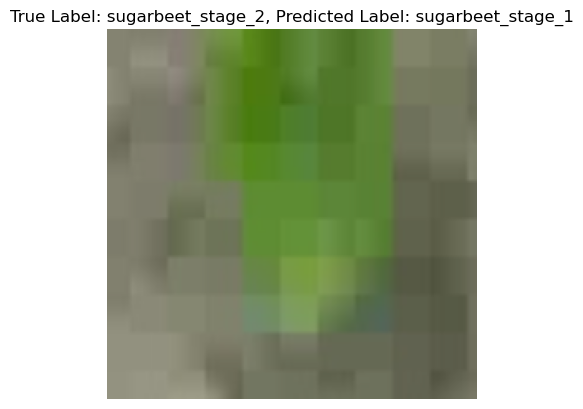

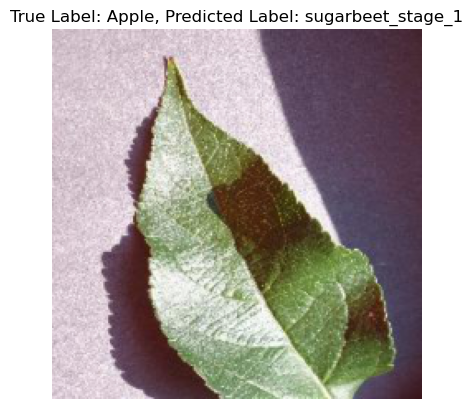

In [54]:
import os
import numpy as np
import torch
from torchvision import transforms
from fastai.learner import load_learner
from PIL import Image
import matplotlib.pyplot as plt

# Load the Learner object with the trained model
model_path = 'model.batch'
learn = load_learner(model_path)

# Set the model to evaluation mode
learn.model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Function to predict images in a given directory and get wrongly predicted images
def predict_images(directory_path):
    wrongly_predicted_images = []
    for image_file in os.listdir(directory_path):
        image_path = os.path.join(directory_path, image_file)
        if not os.path.isfile(image_path):
            continue

        img = Image.open(image_path)
        img = transform(img)
        img = img.unsqueeze(0)

        with torch.no_grad():
            prediction = learn.model(img)

        probabilities = torch.softmax(prediction, dim=1)
        predicted_class_index = torch.argmax(probabilities).item()
        predicted_class_label = learn.dls.vocab[predicted_class_index]

        true_label = os.path.basename(directory_path)

        if predicted_class_label != true_label:
            wrongly_predicted_images.append((img, true_label, predicted_class_label))

    return wrongly_predicted_images

# Define the data directory
data_path = "new_data"  # Replace 'new_data' with the path to your data directory

# Predict and get wrongly predicted images for each subdirectory
sugarbeet_stage_1_wrong = predict_images(os.path.join(data_path, "sugarbeet_stage_1"))
sugarbeet_stage_2_wrong = predict_images(os.path.join(data_path, "sugarbeet_stage_2"))
apple_wrong = predict_images(os.path.join(data_path, "Apple"))

# Display a few wrongly predicted images
num_images_to_display = 3

for img, true_label, predicted_label in sugarbeet_stage_1_wrong[:num_images_to_display] + \
                                     sugarbeet_stage_2_wrong[:num_images_to_display] + \
                                     apple_wrong[:num_images_to_display]:
    # Convert the tensor image to a NumPy array
    img_np = img.squeeze(0).permute(1, 2, 0).numpy()
    
    # De-normalize the image
    img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img_np = np.clip(img_np, 0, 1)

    # Display the image
    plt.imshow(img_np)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
